# ПРАКТИЧЕСКАЯ РАБОТА №4:
##Корреляция, линейная регрессия и дисперсионный анализ

## Импорты

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm
from scipy import stats
import statsmodels.stats.anova as anova
from scipy.stats import ttest_ind
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import seaborn as sns
print("Балакин Даниил ИНБО-02-21")

Балакин Даниил ИНБО-02-21


Подключение

In [ ]:
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vRaJ-Z2G6KPWaXwISL34lBvemR-MXGBBMNVjfSQpCdVjvbjpRcdCa635x2cMcVHbxBrWgKhRxovpIMB/pub?output=csv'
df = pd.read_csv(url)
print("Балакин Даниил ИНБО-02-21")

Балакин Даниил ИНБО-02-21


## Задание №1

Определить два вектора, представляющие собой число автомобилей, припаркованных в течении 5 рабочих дней у бизнес-центра на уличной стоянке и в подземном гараже.
```
|    День   |Улица|Гараж|
|-----------|-----|-----|
|Понидельник|  80 | 100 |
|ВторнИК    |  98 |  82 |
|Среда      |  75 | 105 |
|Четверг    |  91 |  89 |
|Пятница    |  78 | 102 |
```

## Задание №1.1
 Найти и интерпретировать корреляцию между переменными «Улица» и «Гараж» (подсчитать корреляцию по Пирсону).

$$ {r_{xy}=\frac{\displaystyle\sum_{i=1}^{i=k}{(x-\bar{x})\times(y - \bar{y})}}{\sqrt{\displaystyle\sum_{i=1}^{i=k}{(x-\bar{x})^2 \times \displaystyle\sum_{i=1}^{i=k}(y-\bar{y})^2}}}}$$

In [ ]:
S = [80, 98, 75, 91, 78]
G = [100, 82, 105, 89, 102]

def pearson_correlation(x, y):
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    numerator = np.sum((x - mean_x) * (y - mean_y))
    denominator = np.sqrt(np.sum((x - mean_x)**2) * np.sum((y - mean_y)**2))
    return numerator / denominator



print("Реализация ручками: ",pearson_correlation(S,G))
print("Реализация чрез функцию",np.corrcoef(S,G)[0,1])
print("Балакин Даниил ИНБО-02-21")

Реализация ручками:  -1.0
Реализация чрез функцию -0.9999999999999998
Балакин Даниил ИНБО-02-21


## Задание №1.2
Построить диаграмму рассеяния для вышеупомянутых переменных.


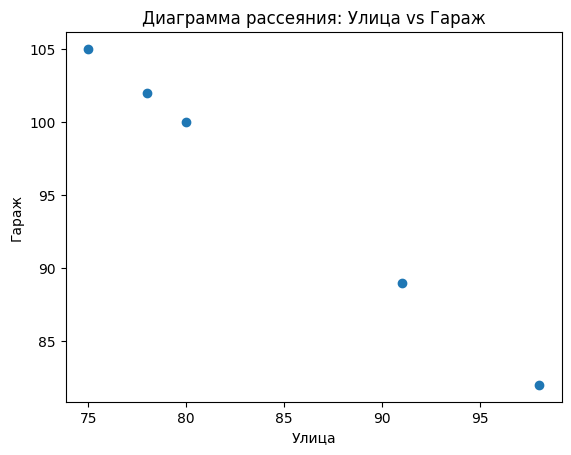

Балакин Даниил ИНБО-02-21


In [ ]:
plt.scatter(S, G)
plt.xlabel("Улица")
plt.ylabel("Гараж")
plt.title("Диаграмма рассеяния: Улица vs Гараж")
plt.show()
print("Балакин Даниил ИНБО-02-21")

## Задание №2
Найти и выгрузить данные. Вывести, провести предобработку и описать признаки.

## Задание №2.1
Построить корреляционную матрицу по одной целевой переменной. Определить наиболее коррелирующую переменную, продолжить с ней работу в следующем пункте.

In [ ]:
df.sex = df.sex.map({'male': 1, 'female': 0})
df.smoker = df.smoker.map({'yes': 1, 'no': 0})
df.region = df.region.map({'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast': 3})
print(df.head())
print("Балакин Даниил ИНБО-02-21")

   age  sex     bmi  children  smoker  region      charges
0   19    0  27.900         0       1       0  16884.92400
1   18    1  33.770         1       0       1   1725.55230
2   28    1  33.000         3       0       1   4449.46200
3   33    1  22.705         0       0       2  21984.47061
4   32    1  28.880         0       0       2   3866.85520
Балакин Даниил ИНБО-02-21


In [ ]:
target_variable = 'bmi' #Целевой столбец
mcorr = {}
maxcorr = ["",-1.000]

for i in range(len(df.keys())):
  if df.keys()[i] != target_variable:
    mcorr[df.keys()[i]] = float(np.corrcoef(df[df.keys()[int(df.columns.get_loc(target_variable))]], df[df.keys()[i]])[0,1])


for i in range(len(df.keys())):
    if df.keys()[i] != target_variable:
      if maxcorr[1] < mcorr[df.keys()[i]]:
        maxcorr[0] = df.keys()[i]
        maxcorr[1] = mcorr[df.keys()[i]]


print(maxcorr)
print("Балакин Даниил ИНБО-02-21")

['charges', 0.19834096883362895]
Балакин Даниил ИНБО-02-21


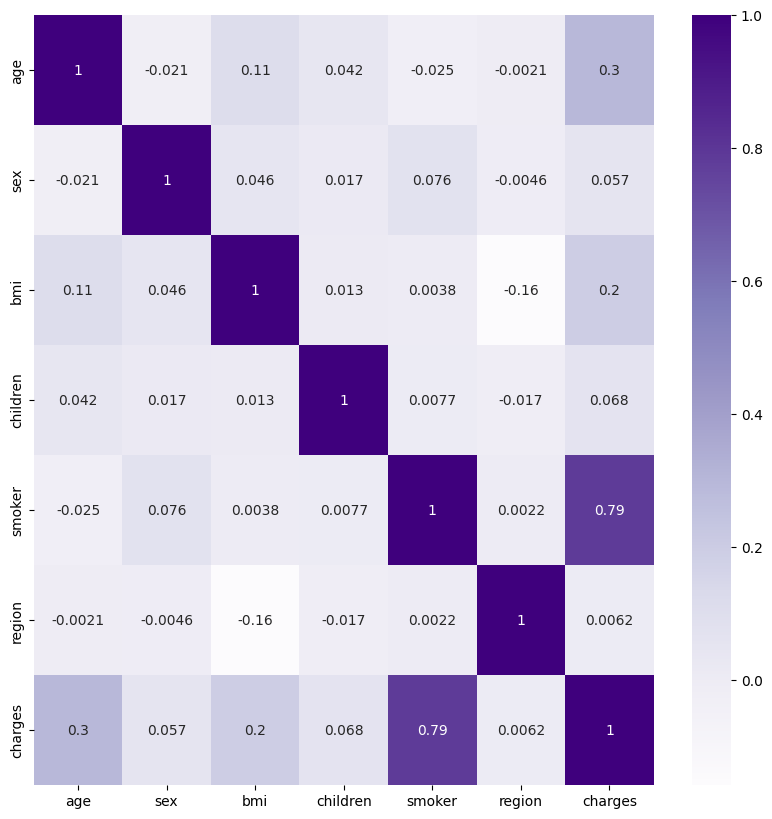

Балакин Даниил ИНБО-02-21


In [ ]:
corr = df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap='Purples')
plt.show()
print("Балакин Даниил ИНБО-02-21")

## Задание №2.2
Реализовать регрессию вручную, отобразить наклон, сдвиг и MSE.

In [ ]:
x = df[maxcorr[0]].values.reshape(-1, 1)
y = df[target_variable].values
n = len(x)
x_mean = np.mean(x)
y_mean = np.mean(y)

numerator = np.sum((x - x_mean) * (y - y_mean))
denominator = np.sum((x - x_mean) ** 2)

slope = numerator / denominator
intercept = y_mean - slope * x_mean

y_pred = slope * x + intercept
mse = np.mean((y - y_pred) ** 2)
print("Наклон:", slope)
print("Сдвиг:", intercept)
print("MSE:", mse)
print("Балакин Даниил ИНБО-02-21")

Наклон: -3.7998776878101546e-20
Сдвиг: 30.66339686098655
MSE: 37.16008997478834
Балакин Даниил ИНБО-02-21


In [ ]:
model = LinearRegression()

# Обучаем модель на данных
model.fit(x.reshape(-1, 1), y)

# Предсказываем значения
y_pred = model.predict(x.reshape(-1, 1))

# Выводим наклон, сдвиг и MSE
slope = model.coef_[0]
intercept = model.intercept_
mse = np.mean((y - y_pred) ** 2)

print("Наклон:", slope)
print("Сдвиг:", intercept)
print("MSE:", mse)


Наклон: 9.987771906652386e-05
Сдвиг: 29.337977354094626
MSE: 35.69824399590979


## Задание №2.3
Визуализировать регрессию на графике.


In [ ]:
model = LinearRegression()
print("Балакин Даниил ИНБО-02-21")

Балакин Даниил ИНБО-02-21


In [ ]:
X = df[[target_variable]]
Y = df[maxcorr[0]]
print("Балакин Даниил ИНБО-02-21")
np.array(X,type(float))
np.array(Y,type(float))

Балакин Даниил ИНБО-02-21


array([16884.924, 1725.5523, 4449.462, ..., 1629.8335, 2007.945,
       29141.3603], dtype=object)

In [ ]:
model.fit(X,Y)
print("Балакин Даниил ИНБО-02-21")

Балакин Даниил ИНБО-02-21


In [ ]:
print("Балакин Даниил ИНБО-02-21")
model.coef_, model.intercept_

Балакин Даниил ИНБО-02-21


(array([393.8730308]), 1192.9372089611497)

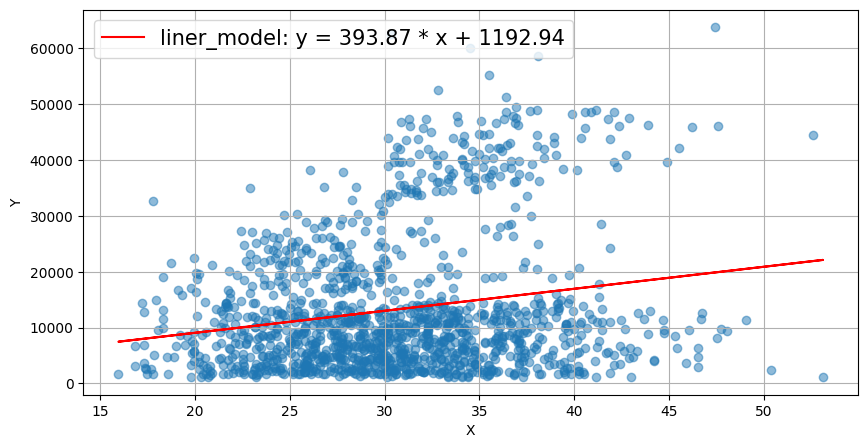

Балакин Даниил ИНБО-02-21


In [ ]:
modela = model.coef_[0]
modelb = model.intercept_
model_y_sk = modela * X + modelb

fig = plt.figure(figsize=(10, 5))
plt.plot(X, model_y_sk, color='red', label = f'liner_model: y = {modela:.2f} * x + {modelb:.2f}')
plt.scatter(X, Y, alpha=0.5)
plt.grid()
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(prop = {'size': 15})
plt.show()
print("Балакин Даниил ИНБО-02-21")

# Задание №3
Загрузить данные: 'insurance.csv'. Вывести и провести предобработку.
Вывести список уникальных регионов.

In [ ]:
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vRaJ-Z2G6KPWaXwISL34lBvemR-MXGBBMNVjfSQpCdVjvbjpRcdCa635x2cMcVHbxBrWgKhRxovpIMB/pub?output=csv'
df = pd.read_csv(url)
print("Балакин Даниил ИНБО-02-21")
df.region.unique()

Балакин Даниил ИНБО-02-21


array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

## Задние №3.1
Выполнить однофакторный ANOVA тест, чтобы проверить влияние
региона на индекс массы тела (BMI), используя первый способ,
через библиотеку Scipy.

In [ ]:
groups = [df['bmi'][df['region'] == region] for region in df['region'].unique()]

fvalue, pvalue = stats.f_oneway(*groups)

print("F-statistic:", fvalue)
print("P-value:", pvalue)

alpha = 0.05
if pvalue < alpha:
    print("Отвергаем нулевую гипотезу. Существует статистически значимая разница в BMI между регионами.")
else:
    print("Не отвергаем нулевую гипотезу. Нет статистически значимой разницы в BMI между регионами.")
print("Балакин Даниил ИНБО-02-21")

F-statistic: 39.49505720170283
P-value: 1.881838913929143e-24
Отвергаем нулевую гипотезу. Существует статистически значимая разница в BMI между регионами.
Балакин Даниил ИНБО-02-21


## Задание №3.2
Выполнить однофакторный ANOVA тест, чтобы проверить влияние
региона на индекс массы тела (BMI), используя второй способ, с
помощью функции anova_lm() из библиотеки statsmodels.

In [ ]:
model = sm.ols('bmi ~ region', data=df).fit()

anova_table = anova.anova_lm(model, typ=2)
print(anova_table)

alpha = 0.05
if anova_table['PR(>F)'][0] < alpha:
    print("Отвергаем нулевую гипотезу. Существует статистически значимая разница в BMI между регионами.")
else:
    print("Не отвергаем нулевую гипотезу. Нет статистически значимой разницы в BMI между регионами.")
print("Балакин Даниил ИНБО-02-21")

                sum_sq      df          F        PR(>F)
region     4055.880631     3.0  39.495057  1.881839e-24
Residual  45664.319755  1334.0        NaN           NaN
Отвергаем нулевую гипотезу. Существует статистически значимая разница в BMI между регионами.
Балакин Даниил ИНБО-02-21


<ipython-input-25-397d5743814f>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table['PR(>F)'][0] < alpha:


## Зание №3.3
С помощью t критерия Стьюдента перебрать все пары. Определить
поправку Бонферрони. Сделать выводы.

In [ ]:
regions = df['region'].unique()
results = []

for i in range(len(regions)):
  for j in range(i + 1, len(regions)):
    region1 = regions[i]
    region2 = regions[j]

    # Выделяем данные для каждой группы
    group1 = df['bmi'][df['region'] == region1]
    group2 = df['bmi'][df['region'] == region2]

    t_statistic, p_value = ttest_ind(group1, group2)

    results.append((region1, region2, t_statistic, p_value))

print("Результаты t-теста:")
for region1, region2, t_statistic, p_value in results:
  print(f"Регион {region1} vs Регион {region2}: t-статистика = {t_statistic:.2f}, p-значение = {p_value:.3f}")

# Поправка Бонферрони
alpha = 0.05
num_comparisons = len(results)
bonferroni_alpha = alpha / num_comparisons

print(f"\nПоправка Бонферрони: alpha = {alpha}, количество сравнений = {num_comparisons}, alpha_корр = {bonferroni_alpha:.3f}")

# Выводим результаты с поправкой Бонферрони
print("\nРезультаты t-теста с поправкой Бонферрони:")
for region1, region2, t_statistic, p_value in results:
  if p_value < bonferroni_alpha:
    print(f"Регион {region1} vs Регион {region2}: t-статистика = {t_statistic:.2f}, p-значение = {p_value:.3f} (Статистически значимая разница)")
  else:
    print(f"Регион {region1} vs Регион {region2}: t-статистика = {t_statistic:.2f}, p-значение = {p_value:.3f} (Нет статистически значимой разницы)")
print("Балакин Даниил ИНБО-02-21")

Результаты t-теста:
Регион southwest vs Регион southeast: t-статистика = -5.91, p-значение = 0.000
Регион southwest vs Регион northwest: t-статистика = 3.28, p-значение = 0.001
Регион southwest vs Регион northeast: t-статистика = 3.12, p-значение = 0.002
Регион southeast vs Регион northwest: t-статистика = 9.26, p-значение = 0.000
Регион southeast vs Регион northeast: t-статистика = 8.79, p-значение = 0.000
Регион northwest vs Регион northeast: t-статистика = 0.06, p-значение = 0.952

Поправка Бонферрони: alpha = 0.05, количество сравнений = 6, alpha_корр = 0.008

Результаты t-теста с поправкой Бонферрони:
Регион southwest vs Регион southeast: t-статистика = -5.91, p-значение = 0.000 (Статистически значимая разница)
Регион southwest vs Регион northwest: t-статистика = 3.28, p-значение = 0.001 (Статистически значимая разница)
Регион southwest vs Регион northeast: t-статистика = 3.12, p-значение = 0.002 (Статистически значимая разница)
Регион southeast vs Регион northwest: t-статистика =

### Выводы:
В зависимости от результатов t-теста с поправкой Бонферрони можно сделать выводы о наличии статистически значимой
разницы в BMI между различными парами регионов.

## Задание №3.4
Выполнить пост-хок тесты Тьюки и построить график.

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
northeast northwest   0.0263 0.9999 -1.1552  1.2078  False
northeast southeast   4.1825    0.0   3.033   5.332   True
northeast southwest   1.4231 0.0107  0.2416  2.6046   True
northwest southeast   4.1562    0.0  3.0077  5.3047   True
northwest southwest   1.3968 0.0127  0.2162  2.5774   True
southeast southwest  -2.7594    0.0 -3.9079 -1.6108   True
----------------------------------------------------------
Балакин Даниил ИНБО-02-21


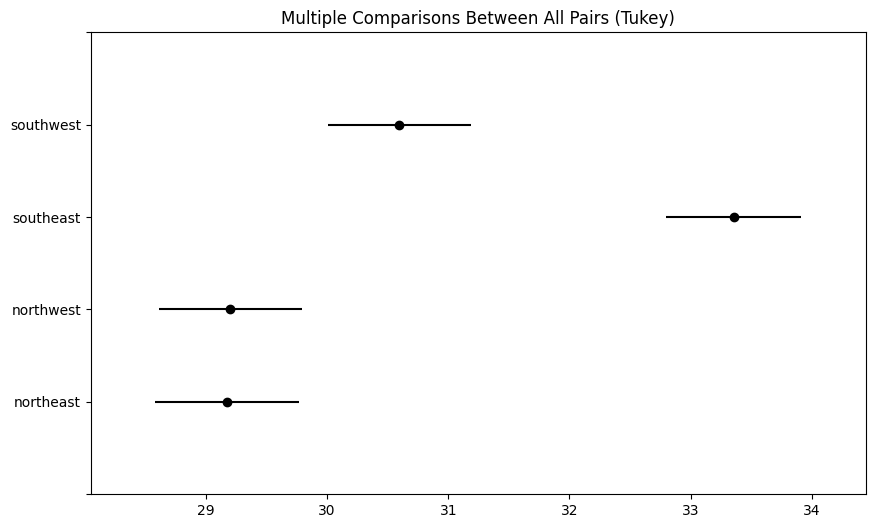

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey_result = pairwise_tukeyhsd(df['bmi'], df['region'], alpha=0.05)
print(tukey_result)

tukey_result.plot_simultaneous()
tukey_result.summary()

print("Балакин Даниил ИНБО-02-21")

## Задание №3.5
Выполнить двухфакторный ANOVA тест, чтобы проверить влияние
региона и пола на индекс массы тела (BMI), используя функцию
anova_lm() из библиотеки statsmodels.

In [ ]:
model = sm.ols('bmi ~ region + sex + region:sex', data=df).fit()
anova_table = anova.anova_lm(model, typ=2)

print(anova_table)


alpha = 0.05

# Проверяем влияние региона
if anova_table['PR(>F)']['region'] < alpha:
    print("Отвергаем нулевую гипотезу. Существует статистически значимая разница в BMI между регионами.")
else:
    print("Не отвергаем нулевую гипотезу. Нет статистически значимой разницы в BMI между регионами.")

# Проверяем влияние пола
if anova_table['PR(>F)']['sex'] < alpha:
    print("Отвергаем нулевую гипотезу. Существует статистически значимая разница в BMI между полами.")
else:
    print("Не отвергаем нулевую гипотезу. Нет статистически значимой разницы в BMI между полами.")

# Проверяем взаимодействие региона и пола
if anova_table['PR(>F)']['region:sex'] < alpha:
    print("Отвергаем нулевую гипотезу. Существует статистически значимое взаимодействие между регионом и полом.")
else:
    print("Не отвергаем нулевую гипотезу. Нет статистически значимого взаимодействия между регионом и полом.")
print("Балакин Даниил ИНБО-02-21")

                  sum_sq      df          F        PR(>F)
region       4034.975135     3.0  39.398134  2.163195e-24
sex            86.007035     1.0   2.519359  1.126940e-01
region:sex    174.157808     3.0   1.700504  1.650655e-01
Residual    45404.154911  1330.0        NaN           NaN
Отвергаем нулевую гипотезу. Существует статистически значимая разница в BMI между регионами.
Не отвергаем нулевую гипотезу. Нет статистически значимой разницы в BMI между полами.
Не отвергаем нулевую гипотезу. Нет статистически значимого взаимодействия между регионом и полом.
Балакин Даниил ИНБО-02-21


## Задание №3.6
Выполнить пост-хок тесты Тьюки и построить график.

         Multiple Comparison of Means - Tukey HSD, FWER=0.05          
     group1          group2     meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------
northeastfemale   northeastmale  -0.2998 0.9998 -2.2706  1.6711  False
northeastfemale northwestfemale  -0.0464    1.0 -2.0142  1.9215  False
northeastfemale   northwestmale  -0.2042    1.0 -2.1811  1.7728  False
northeastfemale southeastfemale   3.3469    0.0    1.41  5.2839   True
northeastfemale   southeastmale   4.6657    0.0  2.7634   6.568   True
northeastfemale southwestfemale   0.7362 0.9497 -1.2377    2.71  False
northeastfemale   southwestmale   1.8051 0.1007 -0.1657   3.776  False
  northeastmale northwestfemale   0.2534 0.9999 -1.7083  2.2152  False
  northeastmale   northwestmale   0.0956    1.0 -1.8752  2.0665  False
  northeastmale southeastfemale   3.6467    0.0  1.7159  5.5775   True
  northeastmale   southeastmale   4.9655    0.0  3.0695  6.8614   True
  nort

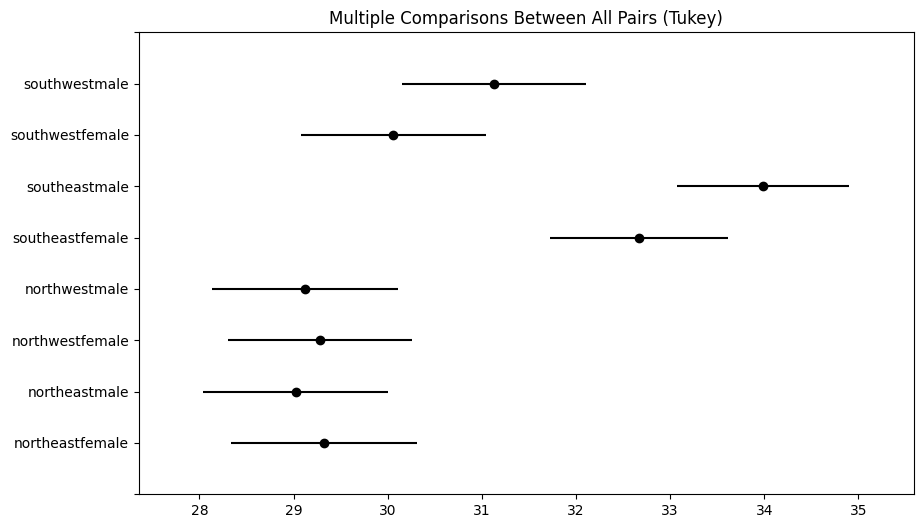

In [ ]:
tukey_result = pairwise_tukeyhsd(df['bmi'], df['region'] + df['sex'], alpha=0.05)

print(tukey_result)

tukey_result.plot_simultaneous()
tukey_result.summary()
print("Балакин Даниил ИНБО-02-21")